* [Sarsa](#Sarsa)
* [Q-Learning](#Q-Learning)
* [Expected Sarsa](#Expected-Sarsa)
* [Comparisons](#Comparisons)

In [1]:
import numpy as np
import gym

## Utility methods

In [7]:
# As every action from each state is chosen using an epsilon-greedy
# policy, there is no need to store an explicit policy. Instead this
# function can be called whenever an acion needs to be selected.
def epsilon_greedy_policy(Q, state, epsilon):
    q_values = Q[state]
    max_q = np.max(q_values)
    rand = np.random.rand()
    if rand <= epsilon:
        return np.random.randint(len(q_values)) 
    else:
        # Arbitarily chooses an action from tied (if any) max action-values
        return np.random.choice(np.argwhere(q_values == max_q).flatten())

In [8]:
# Simple method for evaluating how well a set of learnt action-values are.
def success_rate(env, Q, runs):
    goals_reached = 0
    for episode in range(runs):
        state = env.reset()
        while True:
            action = np.argmax(Q[state])
            state, reward, done, _ = env.step(action)
            if done:
                goals_reached += reward
                break
    env.close()
    
    print("{} goals reached in {} runs.".format(goals_reached, runs))
    print("Accurracy: {}%".format((goals_reached / runs) * 100 ))

In [9]:
def view_sample_run(env, Q):
    state = env.reset()
    while True:
        env.render()
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        if done:
            env.render()
            print('Died!') if reward == 0 else print('Goal reached!')
            break
    env.close()

# Sarsa

In [10]:
def on_policy_sarsa(env, Q, episodes, gamma, epsilon, alpha):
    for episode in range(episodes):
        S = env.reset()
        A = epsilon_greedy_policy(Q, S, epsilon)
        while True:
            next_S, R, done, _ = env.step(A)
            next_A = epsilon_greedy_policy(Q, next_S, epsilon)
            Q[S, A] = Q[S, A] + alpha * (R + gamma * Q[next_S, next_A] - Q[S, A])
            S, A = next_S, next_A
            if done:
                break
    env.close()

In [19]:
env = gym.make('FrozenLake-v0')

In [16]:
# Lookup table for all action-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
gamma = 1     # Discount factor 
epsilon = 0.1 # Chance of exploring by taking any action at random
alpha = 0.1   # Update step size

In [17]:
on_policy_sarsa(env, Q, 100000, gamma, epsilon, alpha)
print('Action-values:\n', Q)
success_rate(env, Q, 100)

Action-values:
 [[0.38542883 0.36852483 0.34806161 0.36607753]
 [0.27419558 0.27512799 0.16057543 0.34169871]
 [0.29875965 0.27228659 0.26465511 0.30148754]
 [0.19177789 0.2312668  0.17135908 0.28112178]
 [0.41467919 0.35643179 0.37340066 0.22440828]
 [0.         0.         0.         0.        ]
 [0.27862809 0.11815691 0.15116011 0.10331756]
 [0.         0.         0.         0.        ]
 [0.29388617 0.2837553  0.36303341 0.45771008]
 [0.40208719 0.59333051 0.36204683 0.24981677]
 [0.55679745 0.28499317 0.3739853  0.29937093]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47338288 0.44533824 0.72902758 0.45517896]
 [0.65252388 0.86656963 0.71640553 0.68136971]
 [0.         0.         0.         0.        ]]
76.0 goals reached in 100 runs.
Accurracy: 76.0%


In [80]:
view_sample_run(env, Q)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Goal reached!


# Q-Learning

In [55]:
def q_learning(env, Q, episodes, gamma, epsilon, alpha):
    for episode in range(episodes):
        S = env.reset()
        while True:
            A = epsilon_greedy_policy(Q, S, epsilon)
            next_S, R, done, _ = env.step(A)
            Q[S, A] = Q[S, A] + alpha * (R + gamma * np.max(Q[next_S]) - Q[S, A])
            S = next_S
            if done:
                break
    env.close()

In [44]:
# Lookup table for all action-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
gamma = 0.9   # Discount factor 
epsilon = 0.1 # Chance of exploring by taking any action at random
alpha = 0.1   # Update step size

In [46]:
q_learning(env, Q, 100000, gamma, epsilon, alpha)
print('Action-values:\n', Q)
success_rate(env, Q, 100)

Action-values:
 [[0.0679356  0.04979244 0.0523198  0.04820485]
 [0.03128135 0.03942026 0.04478199 0.05523301]
 [0.07324997 0.05702781 0.05465407 0.04952464]
 [0.03138686 0.03322866 0.03090326 0.04789186]
 [0.09591423 0.05301047 0.06803787 0.04313018]
 [0.         0.         0.         0.        ]
 [0.0662242  0.06791006 0.14534756 0.01748439]
 [0.         0.         0.         0.        ]
 [0.07013989 0.06129739 0.08529915 0.13853839]
 [0.16067499 0.22097644 0.17818664 0.13653166]
 [0.25837143 0.18039743 0.20386642 0.09300748]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.16466083 0.18498521 0.27491643 0.1801843 ]
 [0.3958154  0.40780153 0.59630805 0.39188552]
 [0.         0.         0.         0.        ]]
75.0 goals reached in 100 runs.
Accurracy: 75.0%


In [85]:
view_sample_run(env, Q)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Goal reached!


# Expected Sarsa

In [56]:
def expected_sarsa(env, Q, episodes, gamma, epsilon, alpha):
    for episode in range(episodes):
        S = env.reset()
        while True:
            A = epsilon_greedy_policy(Q, S, epsilon)
            next_S, R, done, _ = env.step(A)
            next_S_value = get_expected_value(Q, next_S, epsilon)
            Q[S, A] = Q[S, A] + alpha * (R + gamma * next_S_value - Q[S, A])
            S = next_S
            if done:
                break
    env.close()

In [57]:
# Retrieves the expeced value of a state by taking the weighted
# average of all action-values based on the likliehood of them
# being chosen from the epsilon-greedy policy.
def get_expected_value(Q, state, epsilon):
    q_values = Q[state]
    best_action = np.argmax(q_values)
    m = len(q_values)
    state_value = 0
    for action, q_value in enumerate(q_values):
        if action == best_action:
            # The max action has a (1-epislon) chance of being selected as the 
            # greedy action or an epsilon/m chance of being selected at random.
            state_value += (1-epsilon + epsilon/m) * q_value
        else:
            state_value += epsilon/m * q_value
    return state_value

In [71]:
# Lookup table for all action-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
gamma = 1     # Discount factor 
epsilon = 0.1 # Chance of exploring by taking any action at random
alpha = 0.1   # Update step size

In [73]:
expected_sarsa(env, Q, 10000, gamma, epsilon, alpha)
print('Action-values:\n', Q)
success_rate(env, Q, 100)

Action-values:
 [[0.43460378 0.39341619 0.3980886  0.39239535]
 [0.24380414 0.30816516 0.20811536 0.37790806]
 [0.29584985 0.30589546 0.30180186 0.33861333]
 [0.24450326 0.22762405 0.21849362 0.31186174]
 [0.45591821 0.38801159 0.23483287 0.30467676]
 [0.         0.         0.         0.        ]
 [0.35148348 0.16048533 0.18582421 0.13815091]
 [0.         0.         0.         0.        ]
 [0.2824222  0.34477006 0.35369865 0.51021174]
 [0.35390799 0.58628965 0.45059996 0.36611898]
 [0.6117993  0.27794206 0.23756439 0.3131454 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.37723615 0.51404779 0.71696412 0.52320994]
 [0.67611977 0.81479454 0.72735669 0.72165591]
 [0.         0.         0.         0.        ]]
77.0 goals reached in 100 runs.
Accurracy: 77.0%


In [95]:
view_sample_run(env, Q)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Goal reached!


In [2]:
env = gym.make("FrozenLake8x8-v0")
env.observation_space, env.action_space

(Discrete(64), Discrete(4))

In [3]:
# Lookup table for all action-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
gamma = 1     # Discount factor 
epsilon = 0.1 # Chance of exploring by taking any action at random
alpha = 0.1   # Update step size

In [16]:
expected_sarsa(env, Q, 10000, gamma, epsilon, alpha)
success_rate(env, Q, 100)

70.0 goals reached in 100 runs.
Accurracy: 70.0%


# Comparisons

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [80]:
env = gym.make("FrozenLake-v0")

Q_1 = np.zeros((env.observation_space.n, env.action_space.n))
Q_2 = np.zeros((env.observation_space.n, env.action_space.n))
Q_3 = np.zeros((env.observation_space.n, env.action_space.n))
gamma   = 1
epsilon = 0.1
alpha   = 0.1

In [81]:
# List to store accuracies
sarsa = []
q_l = []
exp_sarsa = []

eps = 1 # Episodes in-between evaluation
episodes = range(1, 1001, eps)

In [82]:
for i in episodes:
    on_policy_sarsa(env, Q_1, eps, gamma, epsilon, alpha)
    q_learning(env, Q_2, eps, gamma, epsilon, alpha)
    expected_sarsa(env, Q_3, eps, gamma, epsilon, alpha)
    
    sarsa = np.append(sarsa, get_accuracy(env, Q_1))
    q_l = np.append(q_l, get_accuracy(env, Q_2))
    exp_sarsa = np.append(exp_sarsa, get_accuracy(env, Q_3))
    
    if i % 100 == 0:
        print('Current iteration:', i)

Current iteration: 100
Current iteration: 200
Current iteration: 300
Current iteration: 400
Current iteration: 500
Current iteration: 600
Current iteration: 700
Current iteration: 800
Current iteration: 900
Current iteration: 1000


In [75]:
def get_accuracy(env, Q):
    goals_reached = 0
    for episode in range(500):
        state = env.reset()
        while True:
            action = np.argmax(Q[state])
            state, reward, done, _ = env.step(action)
            if done:
                goals_reached += reward
                break
    env.close()
    return (goals_reached / 500) * 100 

Text(0.5, 1.0, 'gamma=1, epsilon=0.1, alpha=0.1')

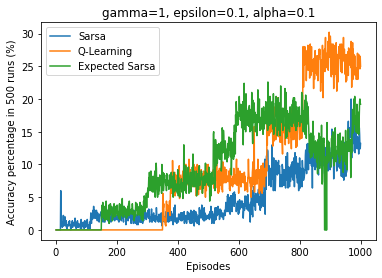

In [84]:
plt.plot(episodes, sarsa, label='Sarsa')
plt.plot(episodes, q_l, label='Q-Learning')
plt.plot(episodes, exp_sarsa, label='Expected Sarsa')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Accuracy percentage in 500 runs (%)')
plt.title('gamma=1, epsilon=0.1, alpha=0.1')